# BASEBALL CASE STUDY

## Importing Libreries

In [1]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

Importing neccessory libreries

In [2]:
#Import the dataset

df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Importing the dataset and see all columns with first five rows.

###### In advertising sales dataset 
###### Input variables are : R,	AB,	H,	2B,	3B,	HR,	BB,	SO,	SB,	RA,	ER,	ERA, CG, SHO, SV, E
###### Target variable is : W

## Shape of data with number of rows and columns 

In [5]:
df.shape

(30, 17)

There are 30 Rows and 17 Columns in dataset

## Detailed description

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum value.

## Datatypes of all columns 

In [69]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

all columns are having integer data types accept ERA column. ERA column is having floating data type.

## Checking is there any null value 

In [70]:
#check is there any null value present in any column

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no missing value in whole dataset.
As we see no null values present, it's safe to proceed.

In [71]:
df.loc[df['W']== " "]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


In [72]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

 As we see there are no missing or spaces are available in target variable.

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

#### 1. Distplot

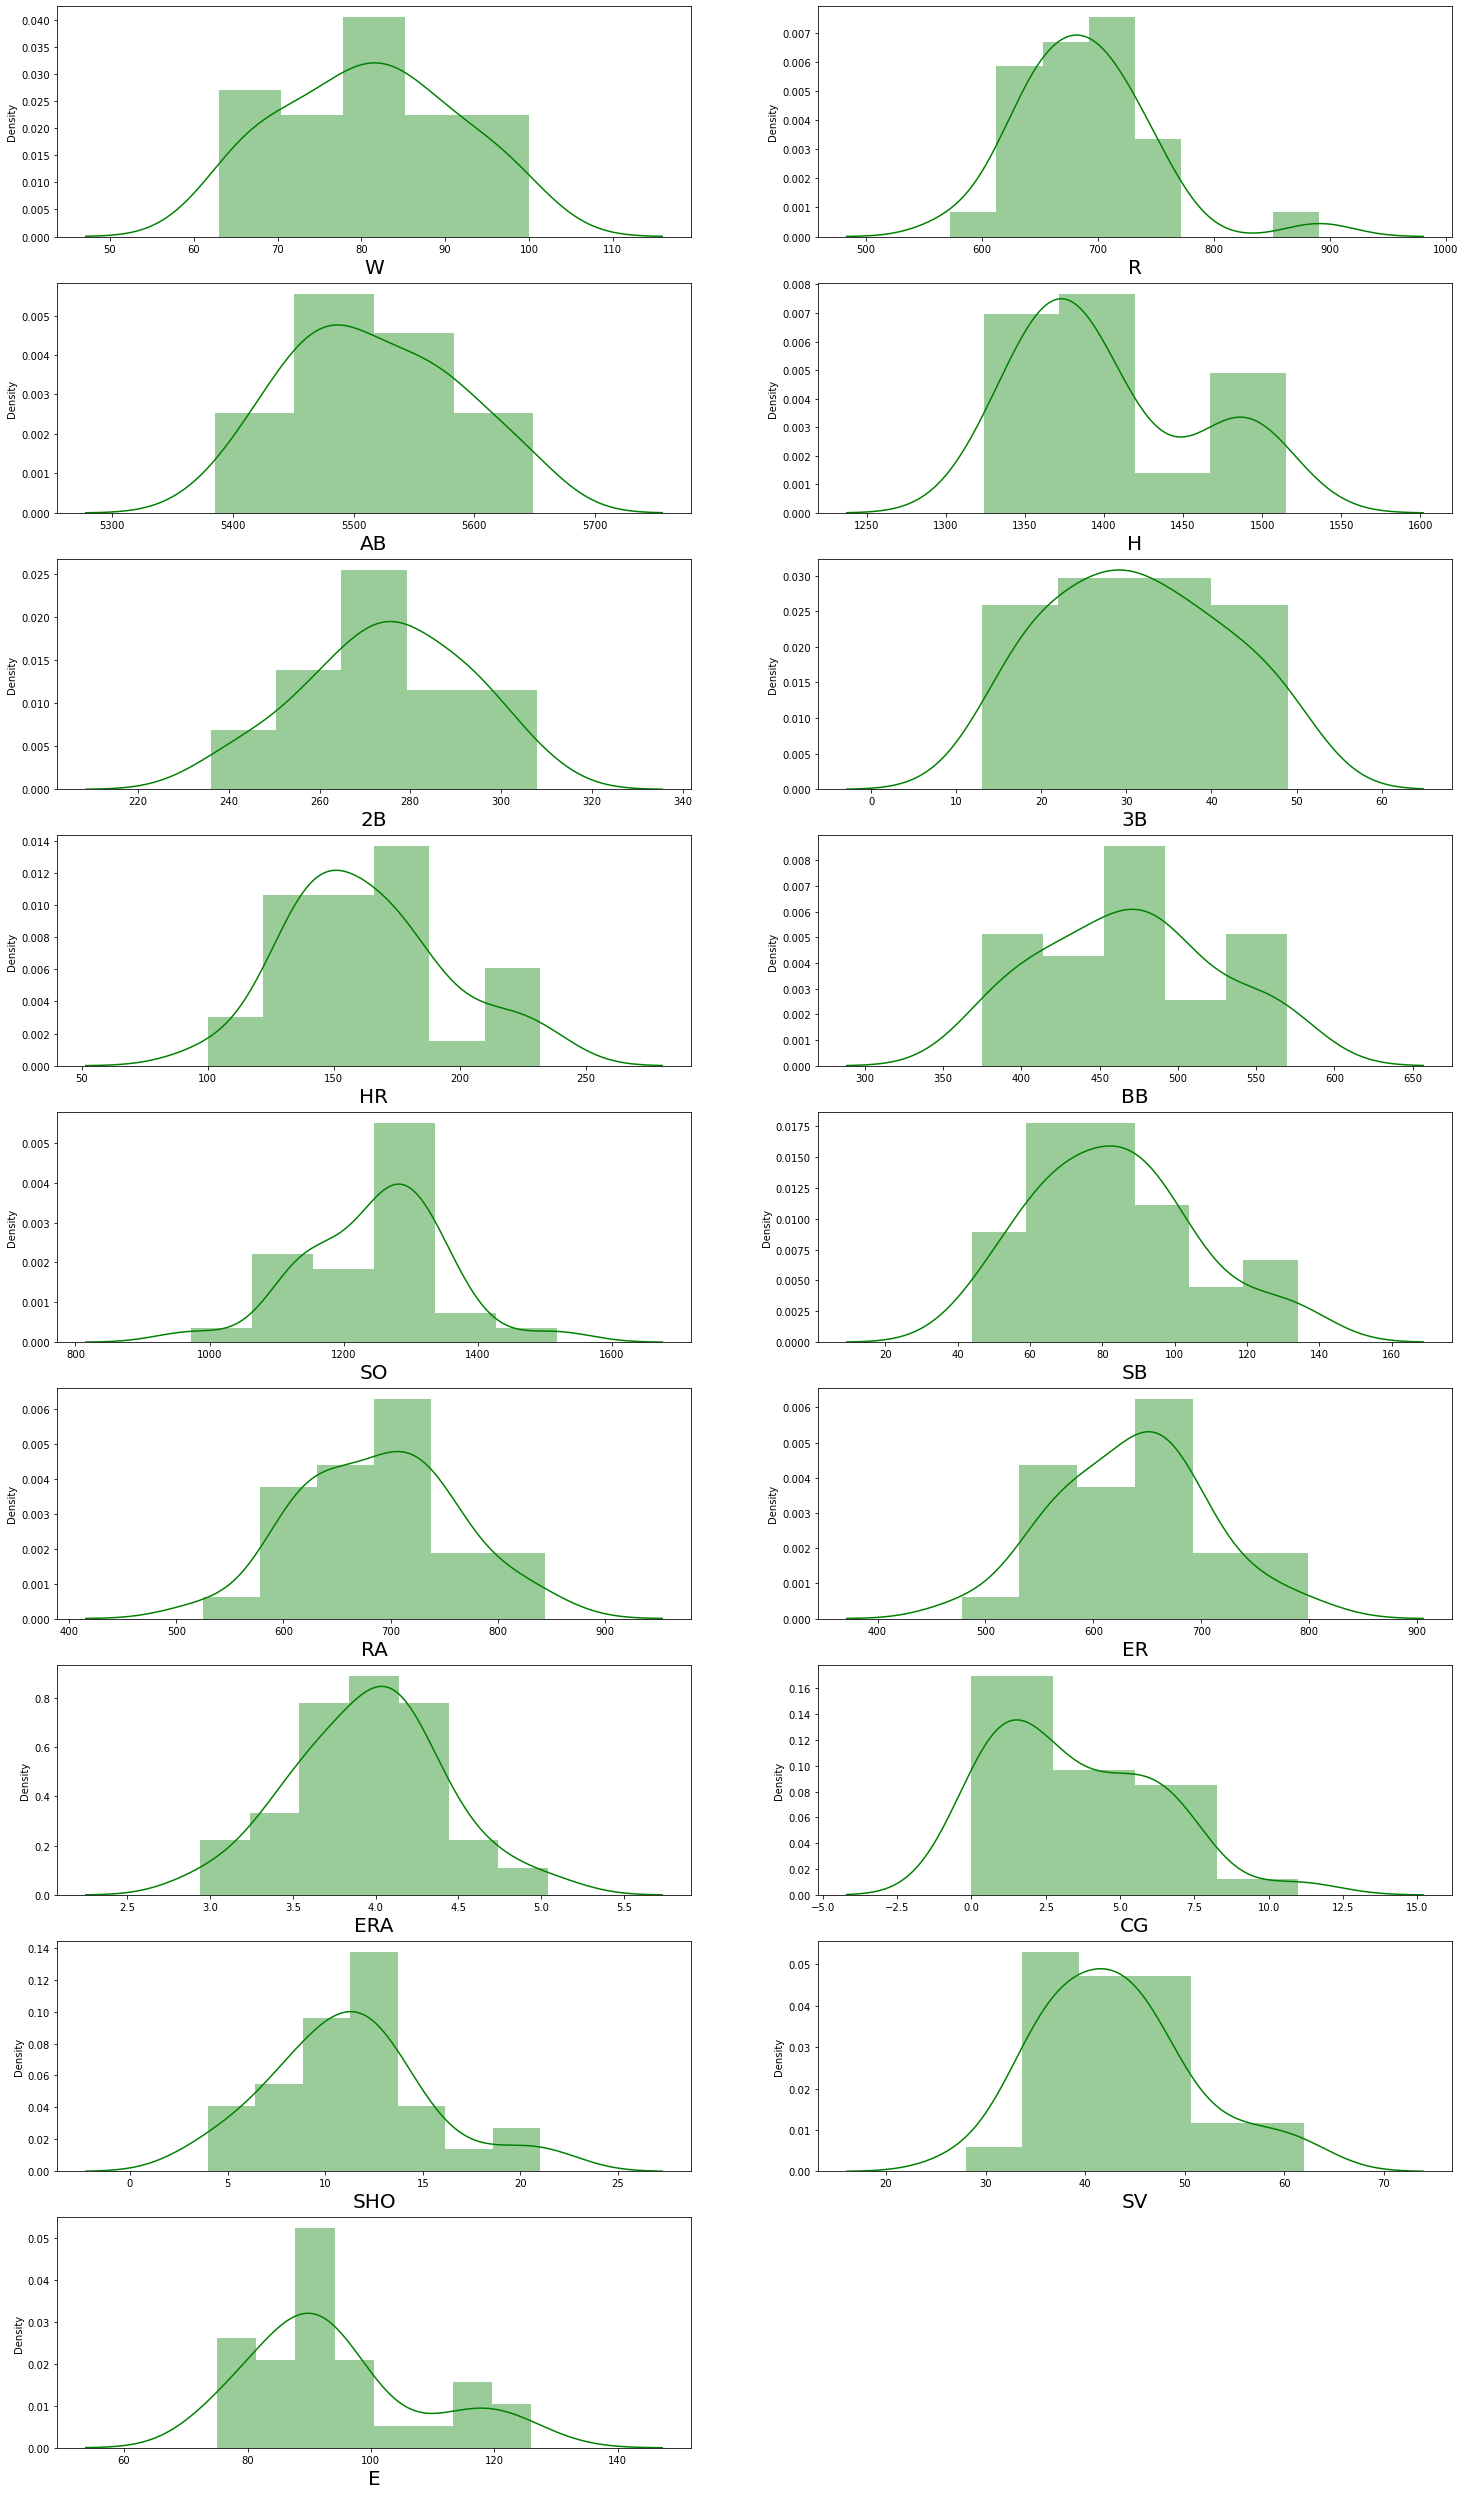

In [73]:
#Relationship Visualizing

plt.figure(figsize = (25,50), facecolor = 'white')
eda = 1

for column in df:
    if eda <= 20: # as we see there are eight columns in the data
        ax = plt.subplot(10,2,eda)
        sn.distplot(df[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    eda += 1
plt.show()

As shown in distplot R, ERA, SHO and E input variable is having slight skewness in it.other Data columns are almost normally distributed. So, we need remove skewness from that the input variable.

#### 2. Histplot

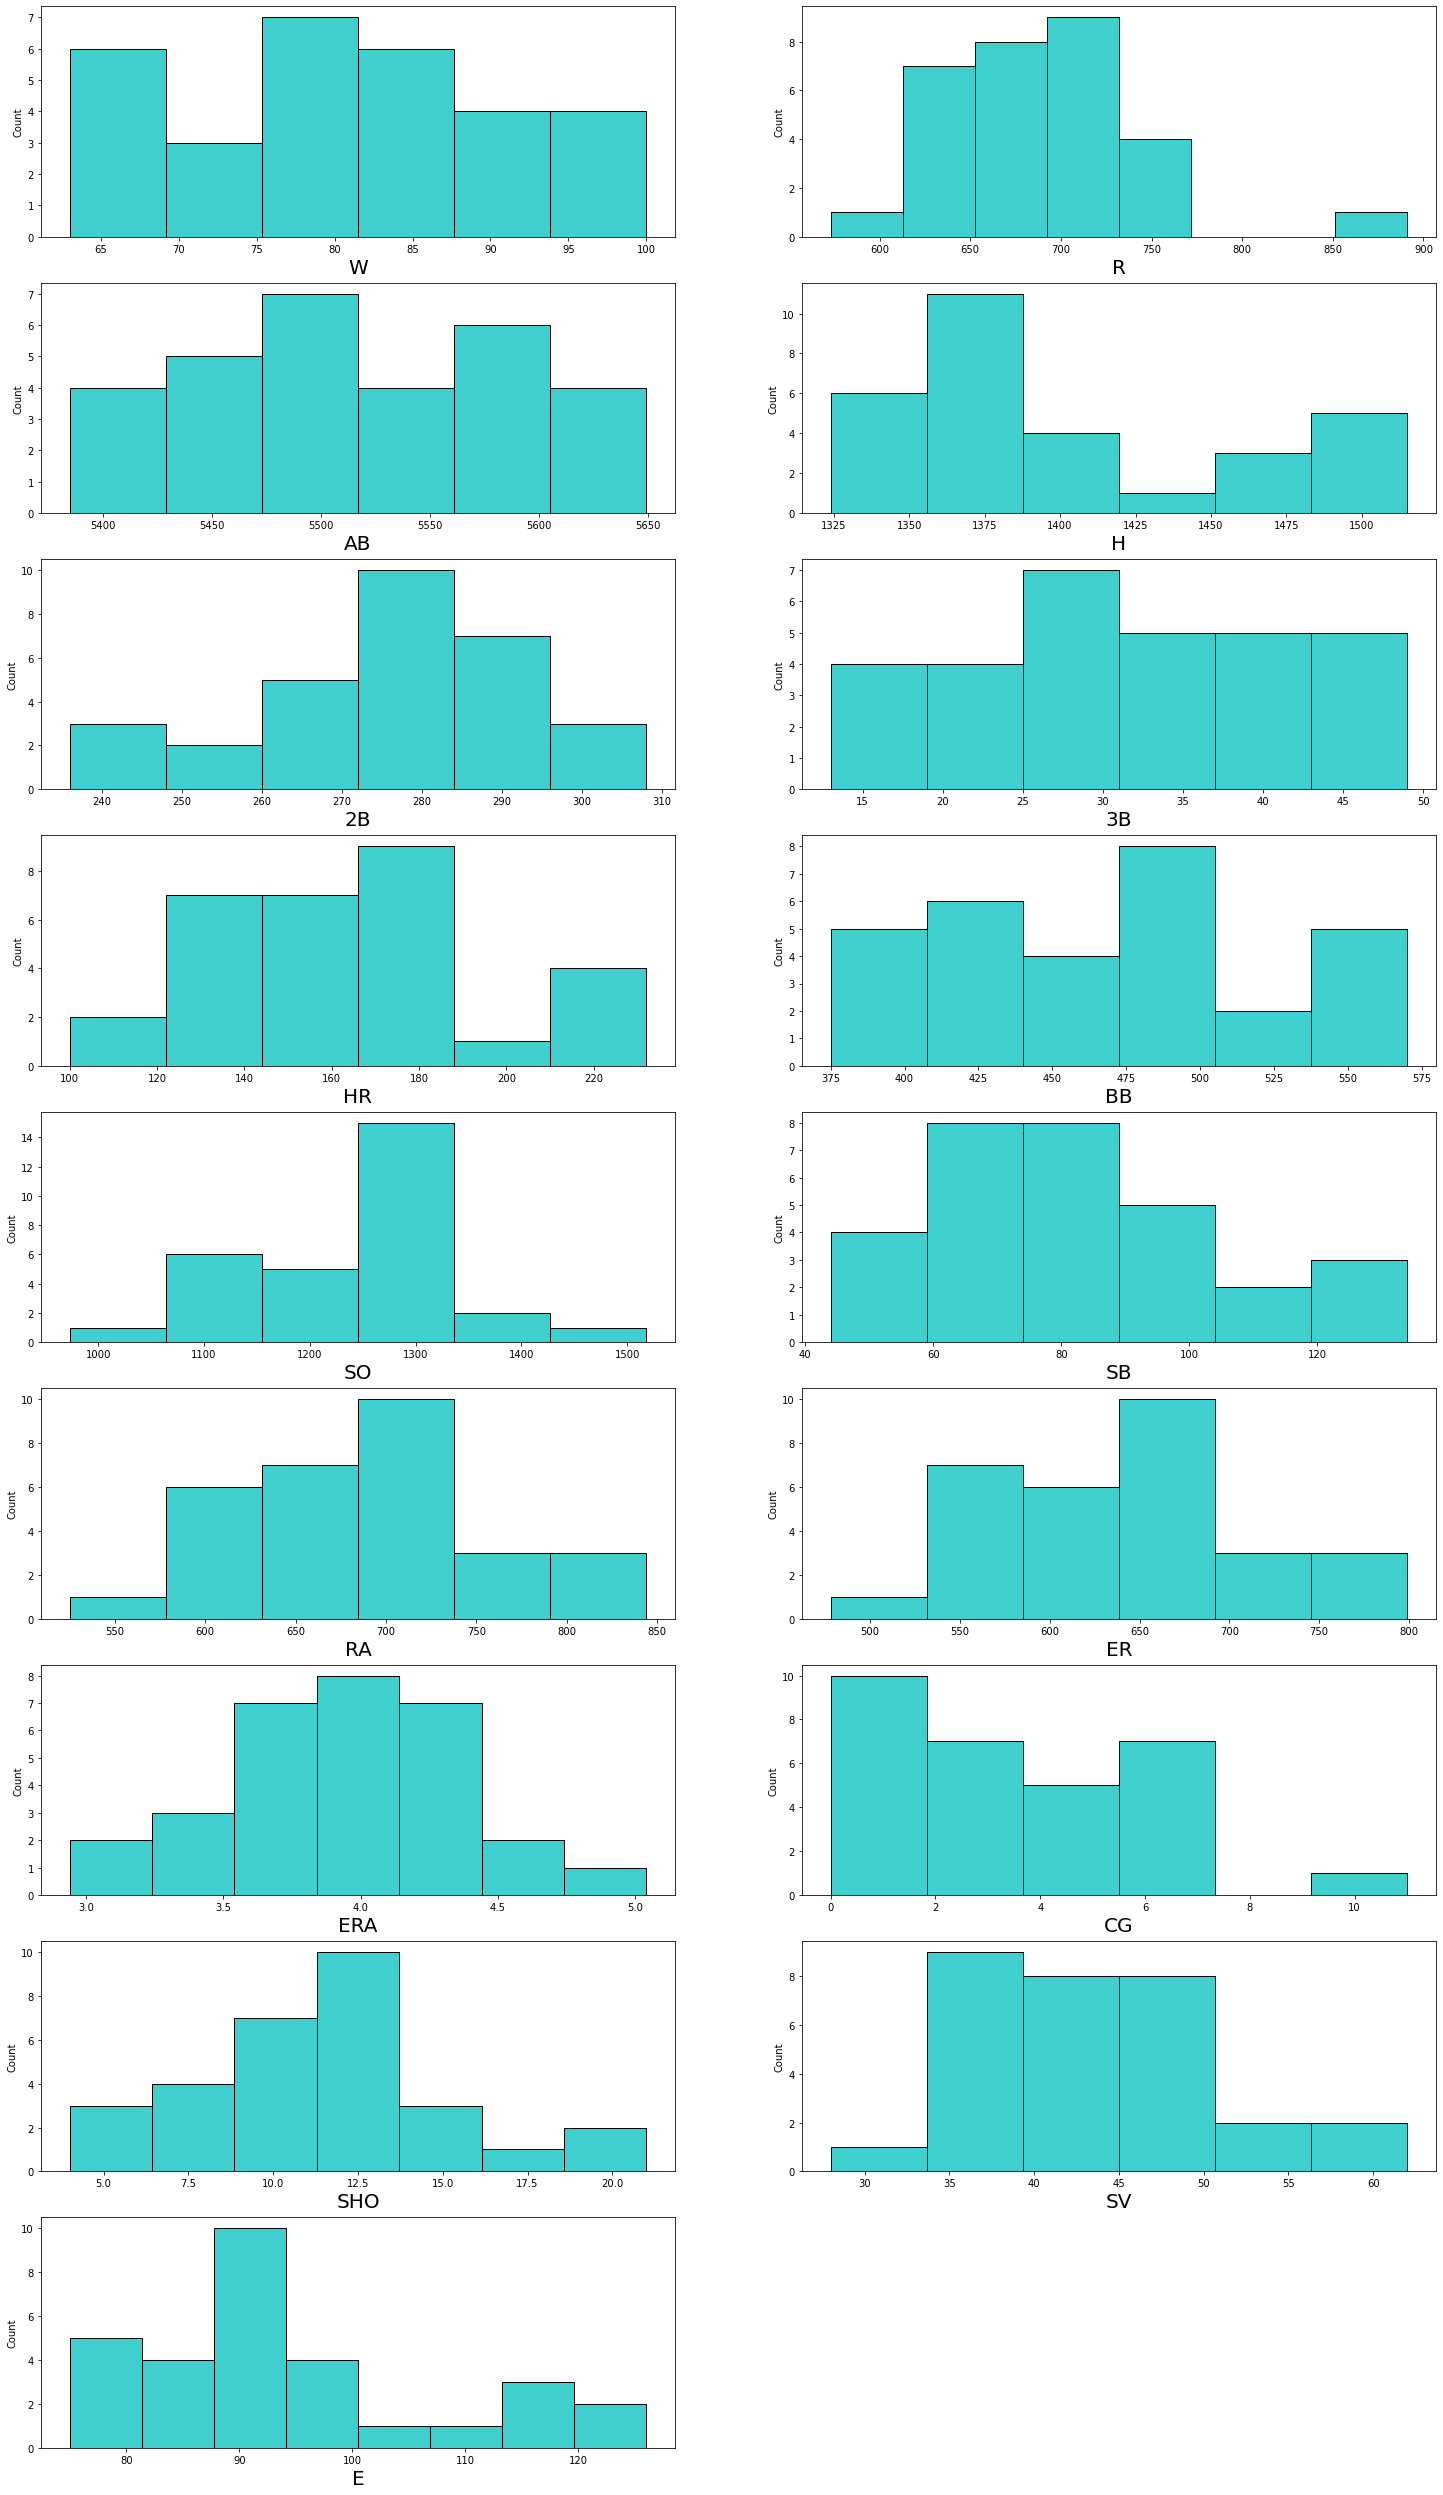

In [74]:
#Relationship Visualizing

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 20: # as we see there are eight columns in the data
        ax = plt.subplot(10,2,plotnumber)
        sn.histplot(df[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

#### 3. Boxplot

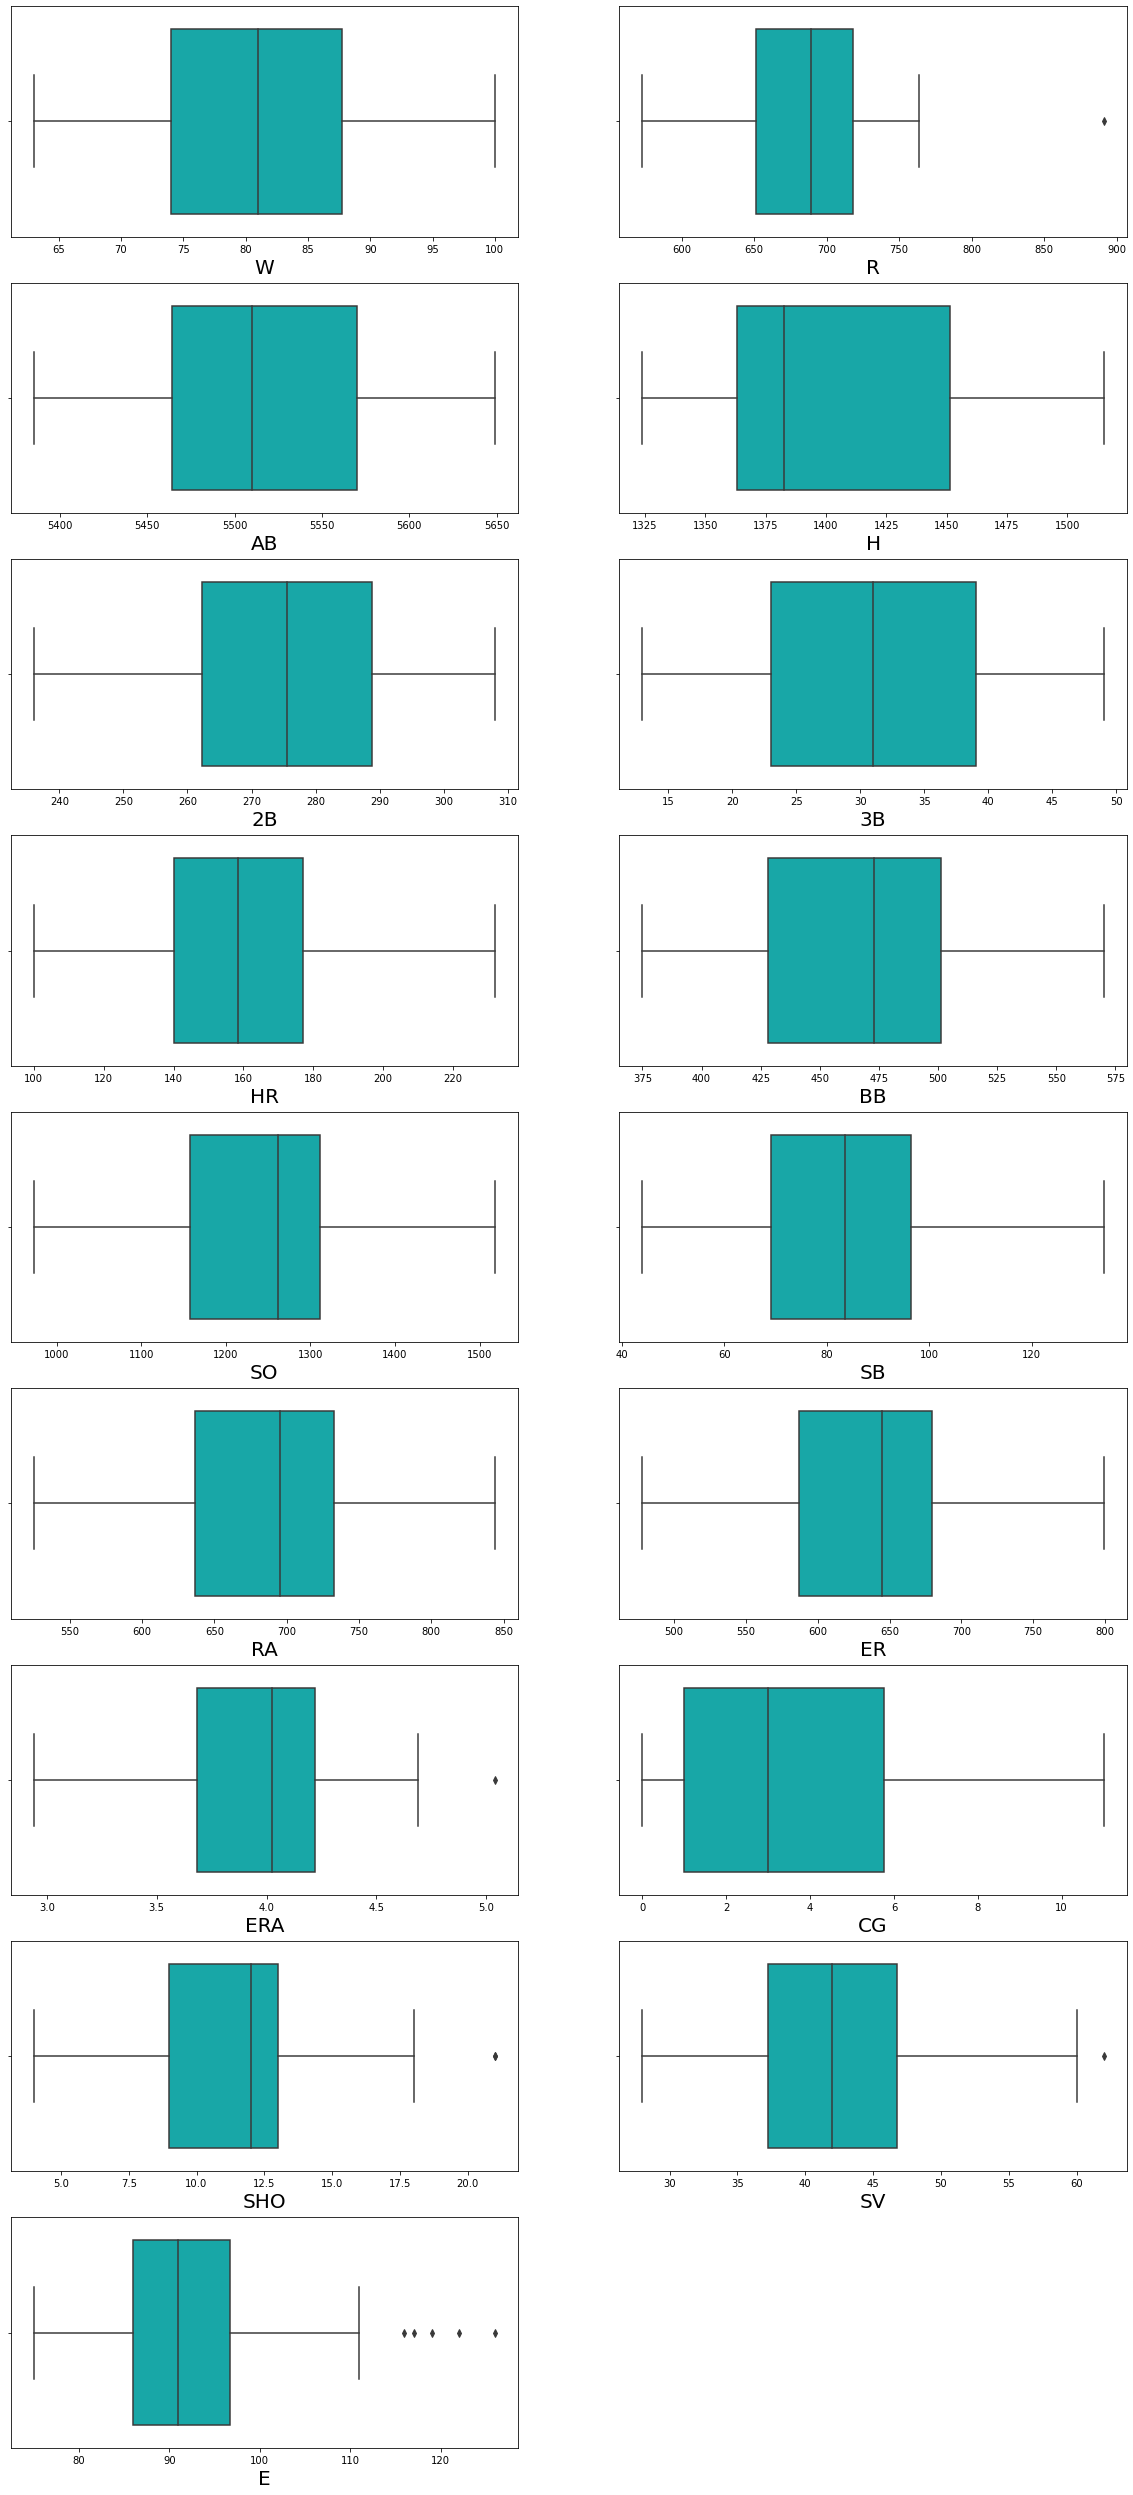

In [75]:
#Relationship Visualizing

plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 20: # as we see there are eight columns in the data
        ax = plt.subplot(10,2,plotnumber)
        sn.boxplot(df[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in boxplot R, ERA, SHO, SV and E input variable is having outliers in it. So, we need remove outliers from that the input variables.

## Bi variate analysis
Bi variate analysis is works with two variables.

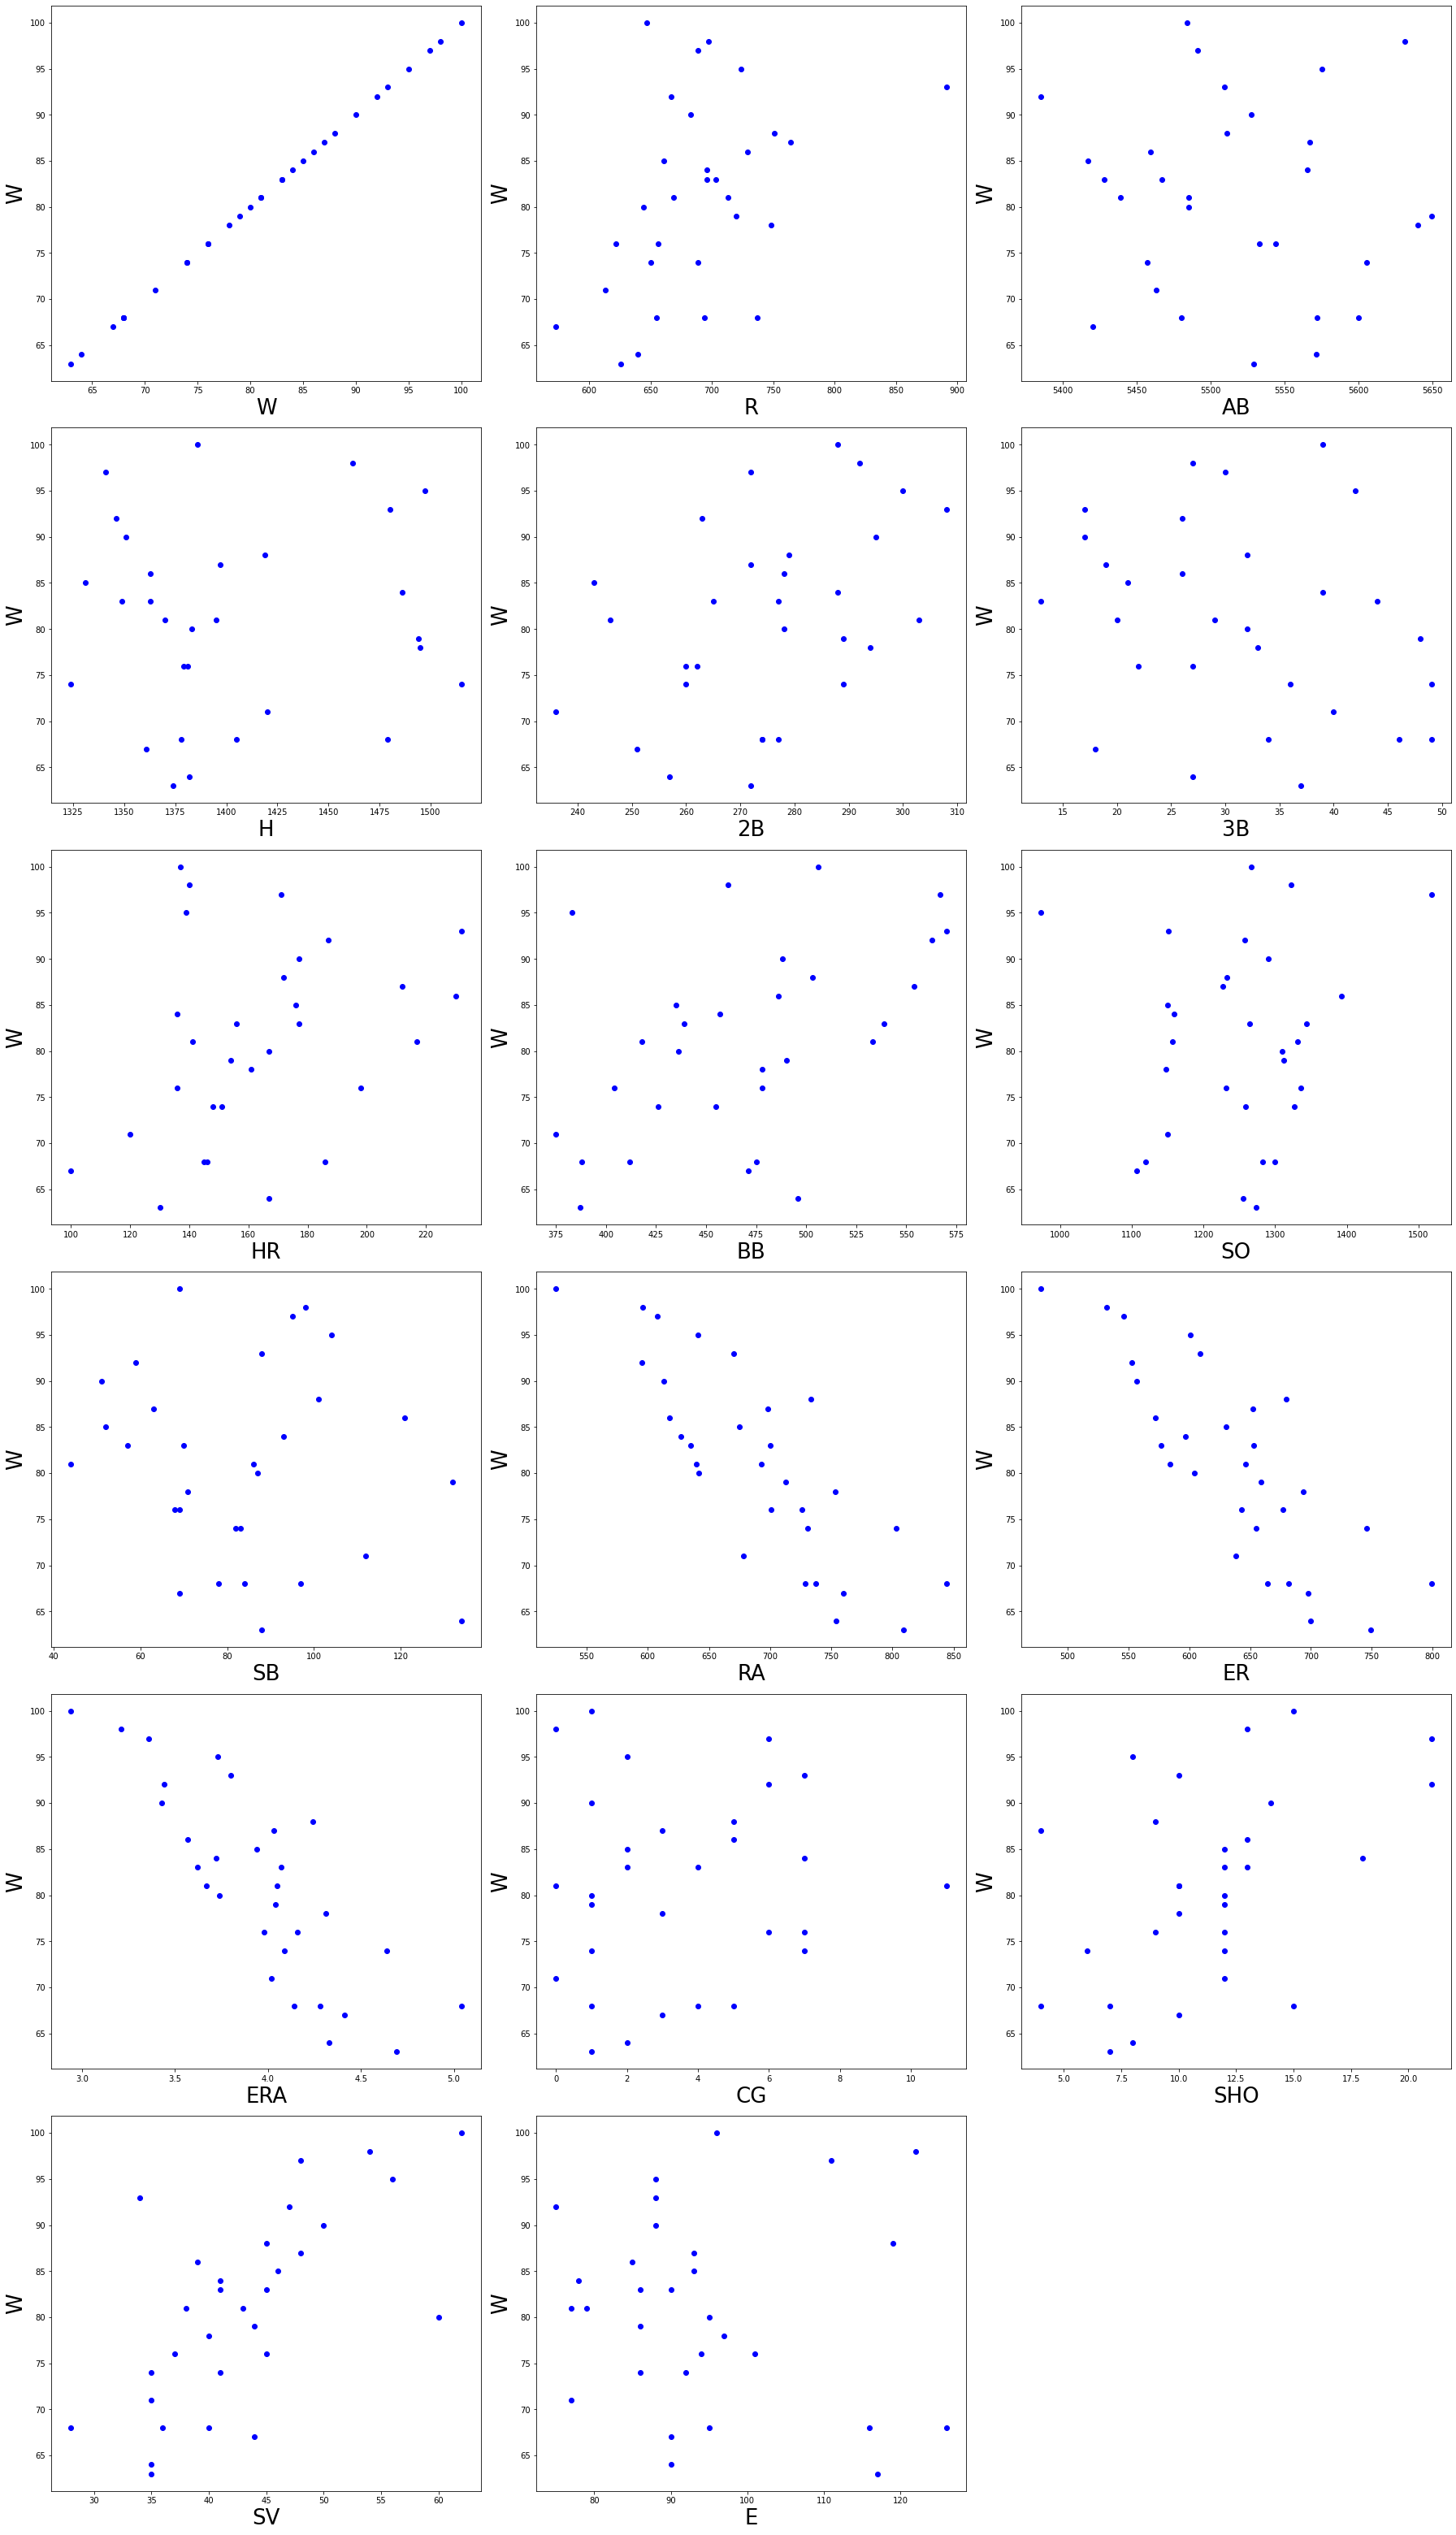

In [76]:
#Relationship Visualizing

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 20:
        ax = plt.subplot(7,3,plotnumber)
        plt.scatter(df[column],df['W'], color='b')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('W', fontsize=26)
    plotnumber += 1
plt.tight_layout()

as we have seen in plot SV, ERA, SHO and R is having almost linear relationship with target variable and other variables are having non linear realationship with target variable(sales). 
and outliers are also present in some column.

# Multi Variate analysis
Multi variate analysis find the relationship with all variables.
Now we will visualize the data and check the coiefficient of multicollinearity

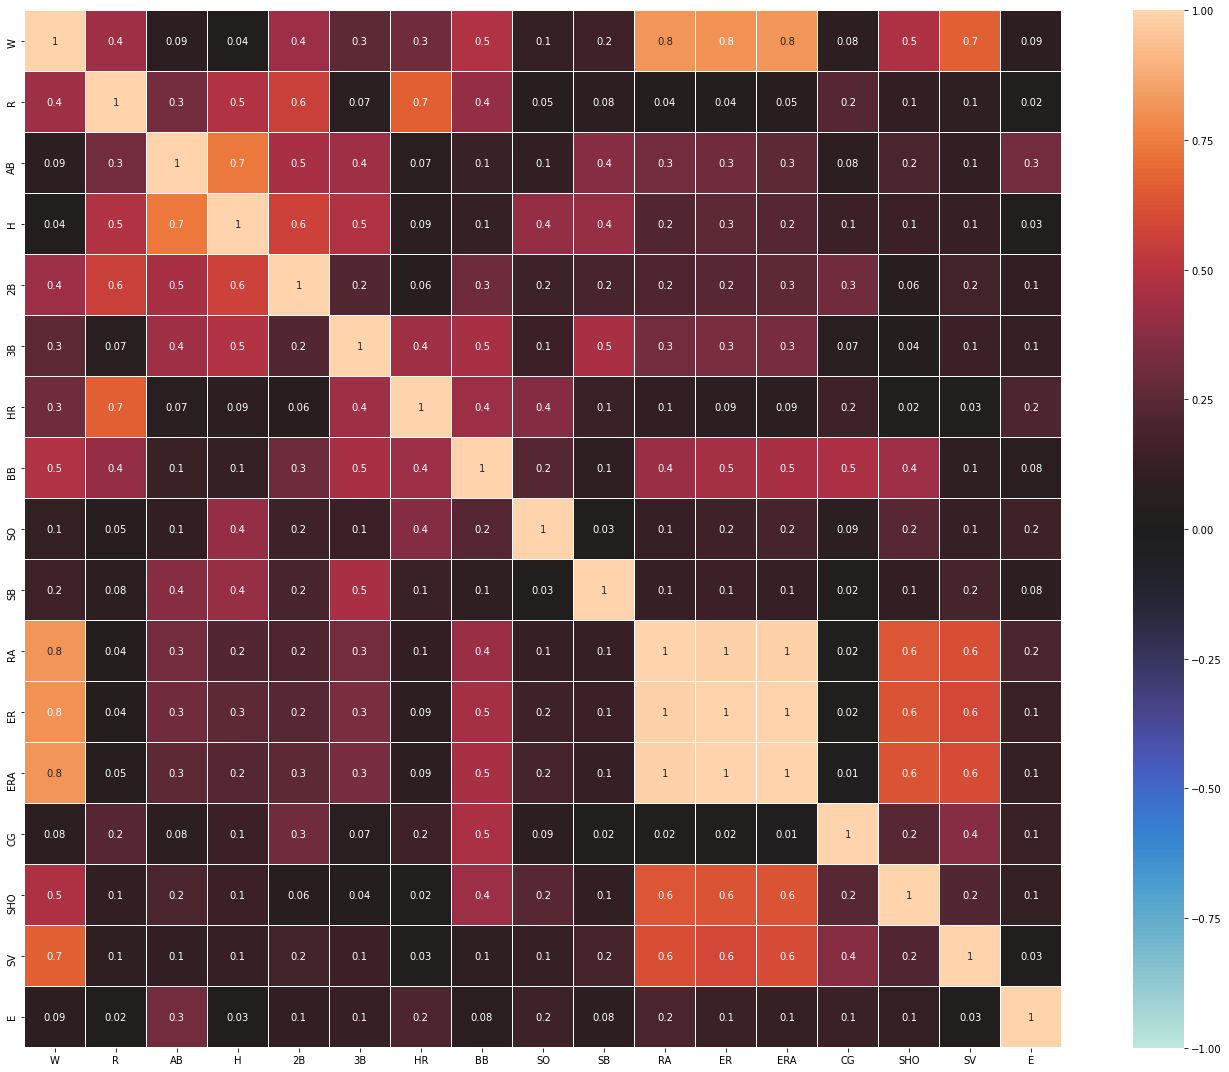

In [77]:
df_cor = df.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(df_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

As shown in heatmap RA, ER and ERA are strongly correlated with W(targate variable) and H column is weekly correlate with targate variable.

### Pairplot

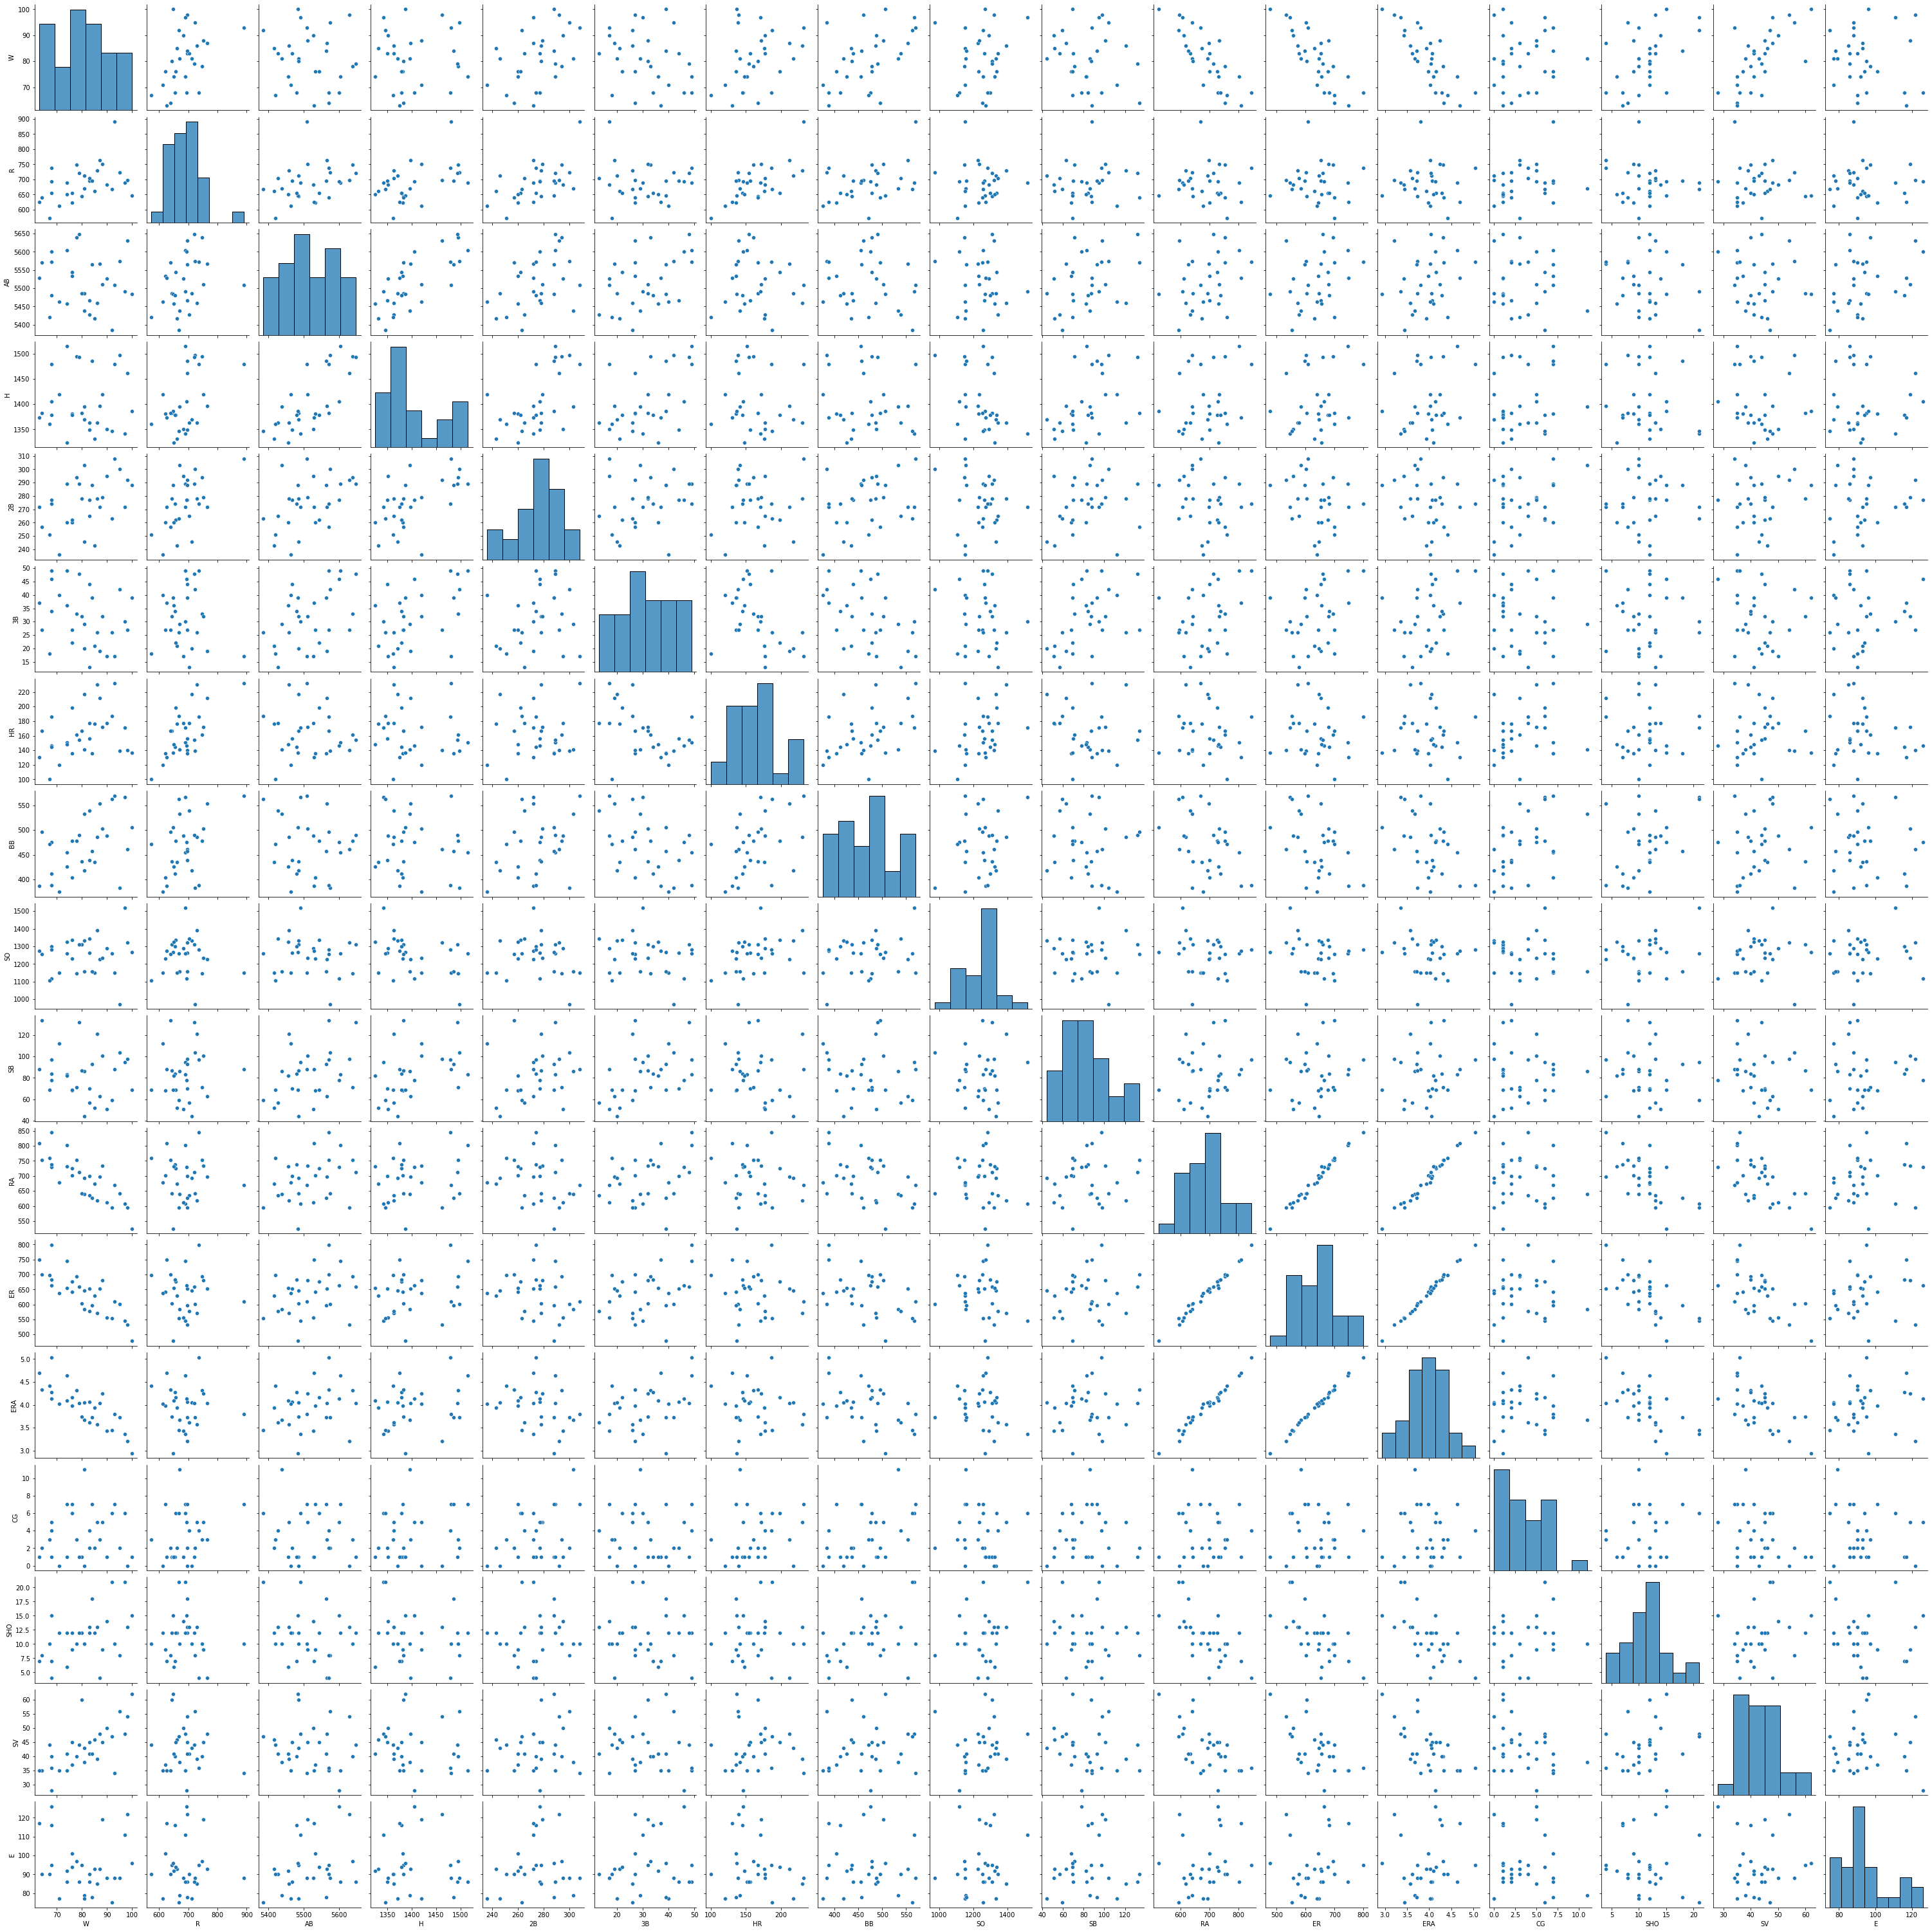

In [78]:
sn.pairplot(df)
plt.show()

##### Find out which columns are positively and negatively correlated with each other

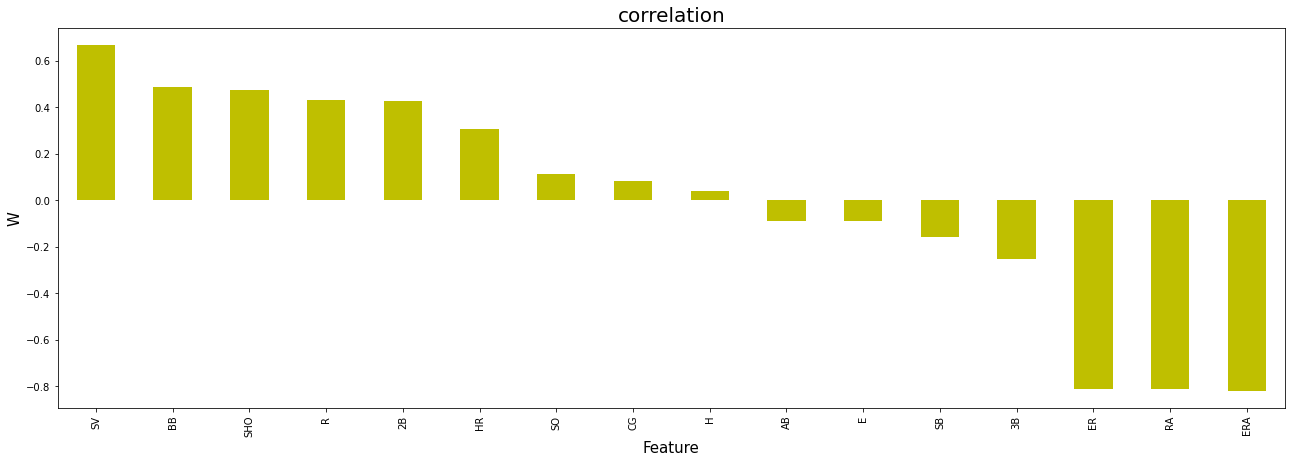

In [79]:
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('W', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

H column is weekly correlate with targate variable.

#### After visualization we conclude that all input variable are having linear/nonlinear relationship with target variable.

In [133]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


## Drop Column

as we can see H feature is weekly correlated with target variable so we can drop that column.

In [7]:
df['H'].unique()

array([1497, 1349, 1395, 1381, 1515, 1480, 1397, 1370, 1383, 1495, 1419,
       1363, 1331, 1379, 1405, 1386, 1462, 1341, 1378, 1382, 1351, 1420,
       1361, 1374, 1346, 1486, 1494, 1324, 1479], dtype=int64)

In [8]:
df['H'].value_counts()

1363    2
1341    1
1497    1
1405    1
1349    1
1351    1
1480    1
1479    1
1419    1
1420    1
1486    1
1361    1
1494    1
1495    1
1370    1
1462    1
1374    1
1378    1
1379    1
1381    1
1382    1
1383    1
1386    1
1515    1
1324    1
1331    1
1395    1
1397    1
1346    1
Name: H, dtype: int64

In [9]:
df=df.drop(['H'], axis=1)

In [10]:
df.describe()

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


H column is having poorly correlated with tagret variable. So, drop that column.

Dataframe after droping H column.

## Remove outliers 
As we see outliers present in some columns. So, remove outliers first.

### 1. Outlier remove using zscore technique

In [3]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(df[[ 'R', '2B', '3B','CG','AB', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'SHO', 'SV', 'E']]) #Put contineuos/float input variable in z-score 
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

new_df = df[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", new_df.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-new_df.shape[0])/df.shape[0])

shape before and after
shape before         : (30, 17)
shape after          : (29, 17)
Percentage Loss      : 0.03333333333333333


In [4]:
(29/30)*100

96.66666666666667

##### 3.333% data loss after using zscore technique
##### 96.667% data remains 
##### Now  we will check how much data lost in IQR technique, use IQR method

## 2. Outlier Removing using IQR
### from boxplot in EDA, we came to know that outliers present in following columns.
#### Visualize data again to check outliers are present at low side or high side

In [87]:
df2 = df

In [88]:
fe = df2[['R', 'ERA', 'SHO', 'SV', 'E']]

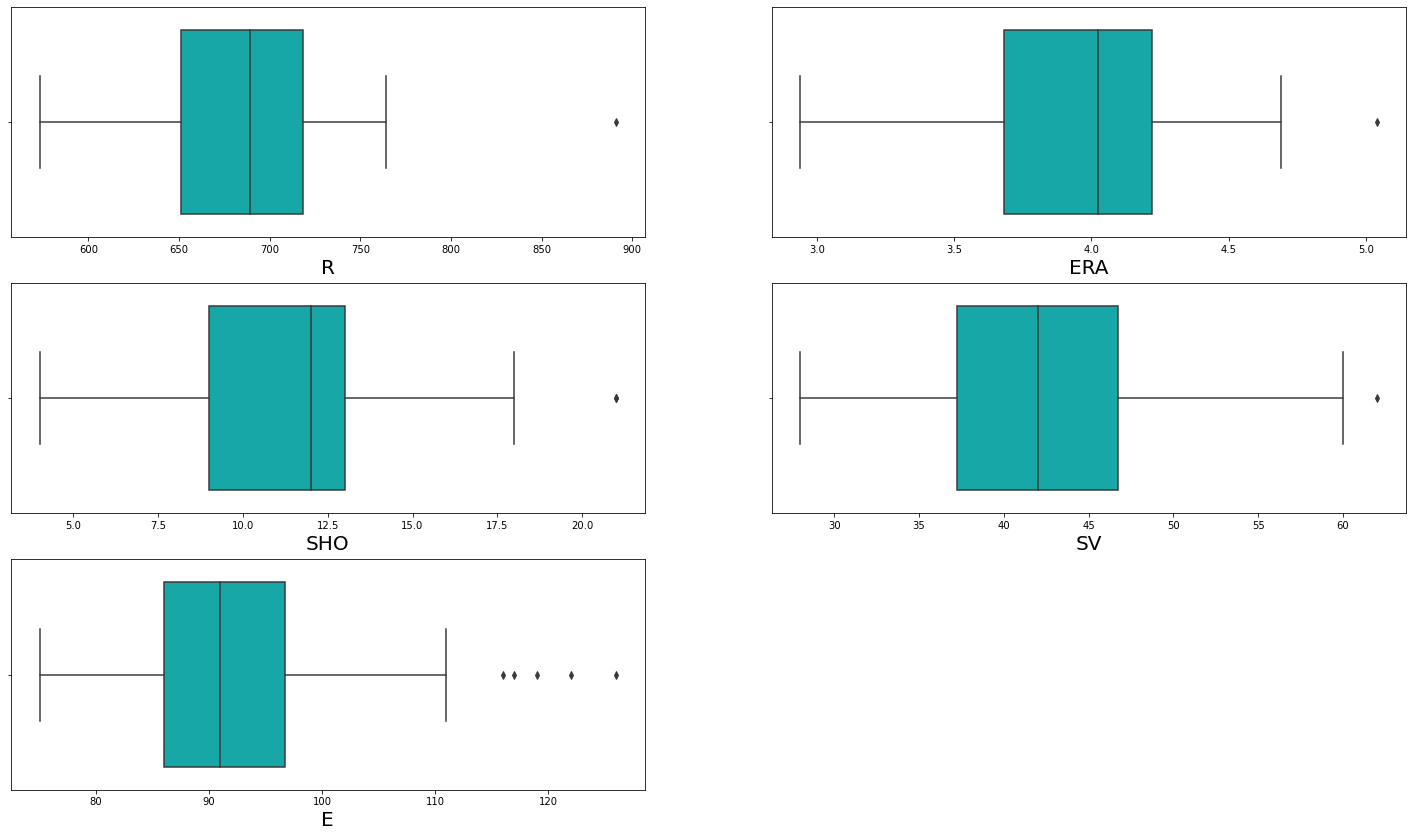

In [89]:
#Relationship Visualizing

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 20: # as we see there are eight columns in the data
        ax = plt.subplot(10,2,plotnumber)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in plot outliers is present in all above columns, so remove it first.

In [90]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = df2.quantile(0.25)

#3rd quantile 75%
q3 = df2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [91]:
df2.describe()

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### Outlier detection formula 
#### Higher side ==> Q3 + (1.5 * IQR)
#### Lower side ==> Q1 - (1.5 * IQR)
as outliers present in higher side and lower side, so we will go with above formulas

In [92]:
#as shown in boxplot we have outlier in higher side of R
#Remove outliers from higher side so, use higher side formula

R_out = (q3.R + (1.5*(iqr.R)))
R_out

818.75

In [93]:
index_out = np.where(df2['R'] > R_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


after removing outliers in R 29 rowss wil remain.

In [94]:
#as shown in boxplot we have outlier in higher side of ERA
#Remove outliers from higher side so, use higher side formula

ERA_out = (q3.ERA + (1.5*(iqr.ERA)))
ERA_out

5.026250000000001

In [95]:
index_out = np.where(df2['ERA'] > ERA_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


after removing outliers in ERA 28 rowss wil remain.

In [96]:
#as shown in boxplot we have outlier in higher side of SHO
#Remove outliers from higher side so, use higher side formula

SHO_out = (q3.SHO + (1.5*(iqr.SHO)))
SHO_out

19.0

In [97]:
index_out = np.where(df2['SHO'] > SHO_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


After removing outliers in SHO 26 rowss wil remain.

In [98]:
#as shown in boxplot we have outlier in higher side of SV
#Remove outliers from higher side so, use higher side formula

SV_out = (q3.SV + (1.5*(iqr.SV)))
SV_out

61.0

In [99]:
index_out = np.where(df2['SV'] > SV_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


After removing outliers in SV 25 rowss wil remain.

In [100]:
#as shown in boxplot we have outlier in higher side of E
#Remove outliers from higher side so, use higher side formula

E_out = (q3.E + (1.5*(iqr.E)))
E_out

112.875

In [101]:
index_out = np.where(df2['E'] > E_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,11,86,729,5459,278,26,230,486,1392,121,618,572,3.57,5,13,39,85


After removing outliers in E column 20 rows wil remain in dataframe.

In [102]:
(30-20)/30 *100

33.33333333333333

In [103]:
20/30 *100

66.66666666666666

In [104]:
print("Data loss in IQR method is: 33.33%")
print("66.66% data remains in after applying it.")

Data loss in IQR method is: 33.33%
66.66% data remains in after applying it.


###### As if we compare in both the techniques 33.33 % data lost in IQR moethod. Now we will go with Zscore technique..

## Check the skewness and remove that

In [5]:
new_df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

As we see there are some variable is skewed, whoes value is not lies between -0.5 to +0.5 this range.
1. CG
2. SV
3. E

### Apply Powertransformation to remove skewness
In log transformation, we will take the log of Continues skewed data and convert that into normal data(distribution)/less skewed data and in power transformation we will take the mean value in place of 0th value.

In [6]:
#applying log transformation on skewed columns
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')


new_df['CG'] = scaler.fit_transform(new_df['CG'].values.reshape(-1,1))

In [7]:
new_df['SV'] = scaler.fit_transform(new_df['SV'].values.reshape(-1,1))
new_df['E'] = scaler.fit_transform(new_df['E'].values.reshape(-1,1))

In [8]:
new_df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.526943
SV    -0.000925
E      0.065585
dtype: float64

#### after using log transformation we can see the skewness of maximum columns get reduced.

<AxesSubplot:xlabel='CG', ylabel='Density'>

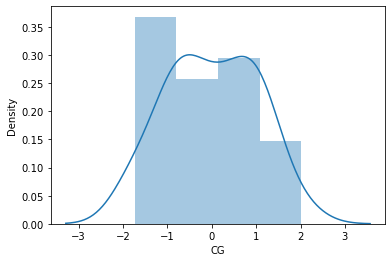

In [9]:
sn.distplot(new_df['CG'])

<AxesSubplot:xlabel='SV', ylabel='Density'>

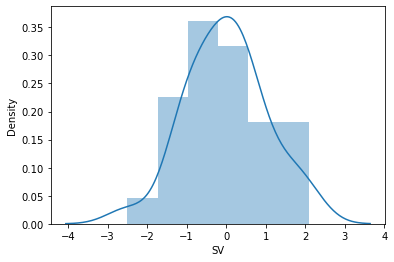

In [10]:
sn.distplot(new_df['SV'])

<AxesSubplot:xlabel='E', ylabel='Density'>

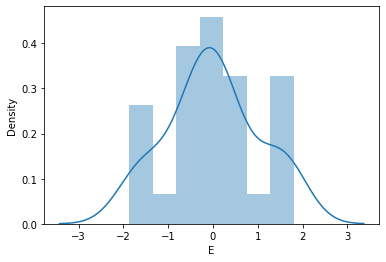

In [11]:
sn.distplot(new_df['E'])

As shown in plot skewness removes after using power transformation skewness removal.

## Seperating the columns into featuers and target:
#### x= features, y=Target 

In [12]:
x = new_df.drop(columns = 'W', axis=1)
y = new_df['W']

## Scalling technique

In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [14]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,7.145507,R
1,20.045249,AB
2,10.070847,H
3,3.617255,2B
4,3.351744,3B
5,8.763664,HR
6,3.478298,BB
7,2.896642,SO
8,1.985509,SB
9,202.458023,RA


as we have saw in the table vif value is greater than 5 for many columns, so drop maximum value column to avoid multiclinearity issue.

In [15]:
new_df=new_df.drop(['ER'], axis=1)

In [16]:
x = new_df.drop(columns = 'W', axis=1)
y = new_df['W']

In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [18]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,6.080594,R
1,7.767459,AB
2,9.327370,H
3,3.320409,2B
4,3.245114,3B
5,7.511649,HR
6,3.477712,BB
7,2.872210,SO
8,1.826482,SB
9,143.511583,RA


In [19]:
new_df=new_df.drop(['RA'], axis=1)

In [20]:
x = new_df.drop(columns = 'W', axis=1)
y = new_df['W']

In [21]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [22]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,6.070722,R
1,5.193313,AB
2,8.212357,H
3,3.313751,2B
4,3.201889,3B
5,6.362933,HR
6,3.138634,BB
7,2.266064,SO
8,1.770932,SB
9,4.820907,ERA


as we have saw in the table vif value is not greater than 5 for columns, so we can proceed further now.

## Finding best random state

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [24]:
from sklearn.tree import DecisionTreeRegressor
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.8881727921964815 on Random_state  8


In [25]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.25, random_state = 8)

# boosting of model by adaboost

In [26]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

In [27]:
ada.fit(x_train, y_train)
y_pred = ada.predict(x_train)

In [29]:
from sklearn import metrics
print('r square score', metrics.r2_score(y_train, y_pred))

r square score 0.9971564849295103


## 1.Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression

Lr=LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [31]:
pred_test=Lr.predict(x_test)

In [32]:
print(r2_score(y_test,pred_test))

0.7351207132780607


## Cross Validation of Linear Regression 

In [33]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Lr, x, y, cv=5, scoring='r2')

cv_mean=cv_score.mean()
cv_mean

0.3444128810455243

## Regularization

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [45]:
ls = Lasso(alpha = 1, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

laso = r2_score(y_test, pred_ls)
laso

0.8524441228466142

In [46]:
cv_score= cross_val_score(ls, x, y, cv=5, scoring='r2')
cv_mean=cv_score.mean()
cv_mean

0.05867009808196868

###### The r2 score for linear regression model is : 94.54%
###### Cross validation score for linear regression is : 41.22%

# 2.Random Forest Regression

In [187]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse', 'mae'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestRegressor()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [189]:
Rfr =RandomForestRegressor(criterion = "mse", max_features="auto")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = r2_score(y_test,pred_decision)
print('R2 Score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

R2 Score:  65.22971602434076
Cross Val Score:  -24.279788294135216


###### The r2 score for Random Forest Regressor model is : 65.22%
###### Cross validation score for Random Forest Regressor is : 24.27%

## 3.Support Vector Regression

In [190]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [191]:
pred_svr = svr.predict(x_test)
print(r2_score(y_test,pred_svr))

0.017177174638112636


In [192]:

cv_score= cross_val_score(svr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.4311880770340193

## 4.Decision Tree Regression

In [193]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [194]:
pred_dt = dt.predict(x_test)
print(r2_score(y_test,pred_dt))

0.6206896551724138


In [195]:
cv_score= cross_val_score(dt, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

-2.560126001121167

## Compare all models

### So, after comparison we conclude that the best model is Linear Regressor. Proceed further with that,

# Saving the model

In [272]:
import joblib
joblib.dump(mod,"Baseballproject.pkl")

['Baseballproject.pkl']

### Loding model

In [273]:
model = joblib.load("Baseballproject.pkl")

In [274]:
prediction = model.predict(x_test)

In [275]:
prediction=pd.DataFrame(prediction)
#converted into data frame

In [276]:
prediction.to_csv('Results.csv', index = False)
#prediction saving

model saved